## Task 1:
### Problem - Develop and evaluate an image classifier using Convolution Neural Network.

### The Data = CIFAR 10 datset.

CIFAR-10 is a dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.
https://www.cs.toronto.edu/~kriz/cifar.html


# CIFAR-10 Multiple Classes
# New section
Example of using Keras for CNNs. Use a famous data set, the CIFAR-10 dataset which consists of 10 different image types.

In [1]:
#
# Your code to import matplotlib, pandas and numpy libraries
#

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

Following code loads the CIFAR 10 datset.

In [2]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
#
# Your code to print shapes of training and test data. Check how the data looks
#

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [4]:
# Your code to print the shape of one image.
print(x_train[1].shape)

(32, 32, 3)


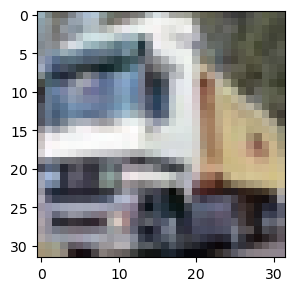

In [5]:
# Your code to show any sample image in the dataset. Use - plt.imshow()
plt.figure(figsize=(3.2, 3.2))
plt.imshow(x_train[1], aspect="auto", interpolation="nearest")

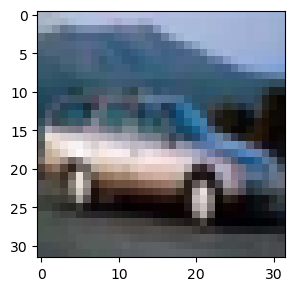

In [6]:
# Show any other image
# Your code to show any sample image in the dataset. Use - plt.imshow()
plt.figure(figsize=(3.2, 3.2))
plt.imshow(x_train[4], aspect="auto", interpolation="nearest")

# PreProcessing

[[[197 187 188]
  [198 188 189]
  [201 191 192]
  ...
  [217 201 204]
  [217 201 204]
  [217 201 204]]

 [[193 183 184]
  [195 185 186]
  [198 188 189]
  ...
  [216 200 203]
  [215 200 202]
  [214 198 201]]

 [[192 182 183]
  [194 184 185]
  [197 187 188]
  ...
  [217 201 204]
  [216 200 203]
  [215 199 202]]

 ...

 [[156 146 147]
  [156 146 147]
  [156 146 147]
  ...
  [ 98  79  65]
  [117  96  82]
  [128 105  89]]

 [[158 148 149]
  [159 149 150]
  [154 144 145]
  ...
  [131 110  96]
  [117  99  86]
  [ 91  75  64]]

 [[152 142 143]
  [151 141 142]
  [145 135 136]
  ...
  [ 91  72  61]
  [ 90  73  63]
  [ 79  65  57]]]


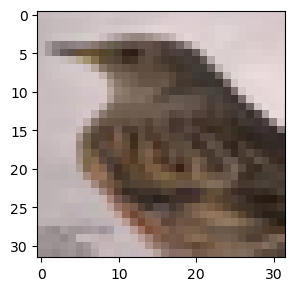

In [7]:
# Your code to print one image in digitals. Check how pixels look like.
# Your code to show any sample image in the dataset. Use - plt.imshow()
print(x_train[18])
plt.figure(figsize=(3.2, 3.2))
plt.imshow(x_train[18], aspect="auto", interpolation="nearest")

In [8]:
# Your code to print shape of any image i.e particular value in the x_train
print(x_train[4].shape)

(32, 32, 3)


255


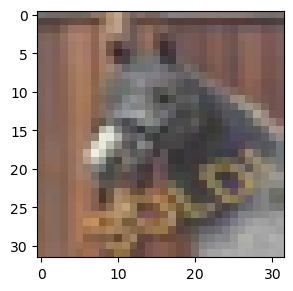

In [9]:
# Your code to print the maximum value in x_train. Hint - Use .max()
print(x_train.max())

plt.figure(figsize=(3.2, 3.2))
plt.imshow(x_train[x_train.argmax()])

In [10]:
x_train = x_train/255
x_test = x_test/255

In [11]:
# Print the shape of x_train again.
print(x_train.shape)

(50000, 32, 32, 3)


In [12]:
# Print the shape of y_train again.
print(y_train.shape)

(50000, 1)


# One hot vector encoding.
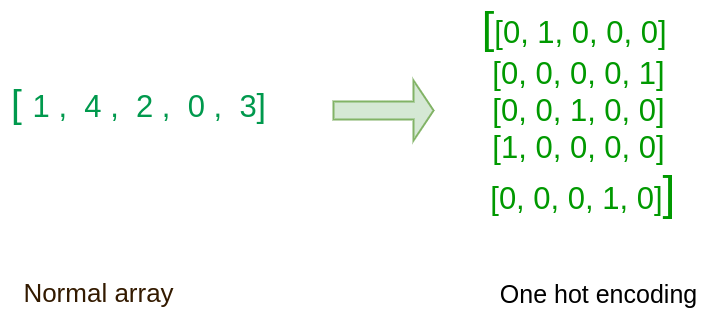


The "to_categorical()" is converting the integer value to binary categorical matrix :: https://keras.io/api/utils/python_utils/#to_categorical-functionLinks to an external site.

In [13]:
from tensorflow.keras.utils import to_categorical
# Your code to print shape of y_train [0]
print(y_train[0].shape)
# Your code to use to_categorical to convert integers to numbers. Assign the new array to the variable y_cat_train
y_cat_train = to_categorical(y_train, num_classes=10)

(1,)


In [14]:
# Your code to print shape of the array y_cat_train
print(y_cat_train.shape)

(50000, 10)


In [15]:
# Your code to print any single value in the array y_cat_train and print y_train with the same index.
print(y_train[4])
print(y_cat_train[4])
# Compare the result for better understanding of "to_categorical()"

[1]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [16]:
# Your code to:
# Convert y_test to the encoded vector in same manner/ Assign it to the variable y_cat_test
y_cat_test = to_categorical(y_test, num_classes=10)
# Print the shapes to look how y_cat_test looks.
print(y_cat_test.shape)

(10000, 10)


----------
# Building the Model

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

#### Please read the following links before creating code for the next cell

https://keras.io/api/layers/convolution_layers/convolution2d/
    
https://keras.io/api/layers/pooling_layers/max_pooling2d/

In [18]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=48, kernel_size=(4,4), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))

#
# Add more convolution and pooling layers with your choice of filters, strides, and activation function
#

model.add(Flatten())

#
# Add few dense layers. 
#

model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(64, activation="relu"))

#
# Output Layer. 
#

model.add(Dense(10, activation="softmax"))


In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 48)        24624     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 48)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1200)              0         
                                                                 
 dense (Dense)               (None, 128)               1

### We could use early stopping in Keras to break from the training.
### What this does is for successive iterations it monitors the loss. If the loss does not decreases for a certain number of iterations denoted by variable 'patience' then the training stops.
### Following code shows how you can use early stopping.


In [20]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3)

In [21]:
# Your code to compile the models (model.compile). Use 'categorical cross entropy' as the loss function
# and use 'accuracy' as the metrics
# Your can use the optimiser of your choice

model.compile(loss="categorical_crossentropy", metrics="accuracy", optimizer='adam')

In [22]:
# Your code to fit the model (model.fit). Use additional parameter -  callbacks = [early_stop] to eanable early stopping. 
# use 'history' array to save the training parameters for each epoch
history = model.fit(x_train, y_cat_train, verbose = 1, batch_size = 25, callbacks=[early_stop], validation_data=(x_test, y_cat_test), epochs = 30)

Epoch 1/30


2000/2000 [==============================] - 35s 17ms/step - loss: 1.6593 - accuracy: 0.3895 - val_loss: 1.3696 - val_accuracy: 0.5056
Epoch 2/30
2000/2000 [==============================] - 33s 16ms/step - loss: 1.3613 - accuracy: 0.5108 - val_loss: 1.2175 - val_accuracy: 0.5718
Epoch 3/30
2000/2000 [==============================] - 25s 13ms/step - loss: 1.2334 - accuracy: 0.5633 - val_loss: 1.1568 - val_accuracy: 0.5942
Epoch 4/30
2000/2000 [==============================] - 30s 15ms/step - loss: 1.1398 - accuracy: 0.5972 - val_loss: 1.0386 - val_accuracy: 0.6328
Epoch 5/30
2000/2000 [==============================] - 31s 16ms/step - loss: 1.0799 - accuracy: 0.6187 - val_loss: 1.0041 - val_accuracy: 0.6460
Epoch 6/30
2000/2000 [==============================] - 30s 15ms/step - loss: 1.0319 - accuracy: 0.6383 - val_loss: 0.9685 - val_accuracy: 0.6581
Epoch 7/30
2000/2000 [==============================] - 31s 16ms/step - loss: 0.9895 - accuracy: 0.6540 - val_loss: 0.9978

### We can save the model in a file. Following code shows how to do this.

In [23]:
# Careful, don't overwrite file!
model.save('cifar_10epochs.keras')

### We can save the loss at every step. Following code shows how to do this. 

In [24]:
losses = pd.DataFrame(model.history.history)

In [25]:
# Print first few rows of losses.
losses.head(5)

,loss,accuracy,val_loss,val_accuracy
0,1.659276,0.38948,1.369596,0.5056
1,1.361343,0.51080,1.217494,0.5718
2,1.233356,0.56328,1.156769,0.5942
3,1.139813,0.59720,1.038592,0.6328
4,1.079870,0.61870,1.004125,0.6460


### Visualise a plot between accuracy vs val_accuracy for all steps.

### x axis will have the steps (epochs) 
### y axis will have accuracy and val_accuracy 





<Axes: >

<Figure size 1000x1000 with 0 Axes>

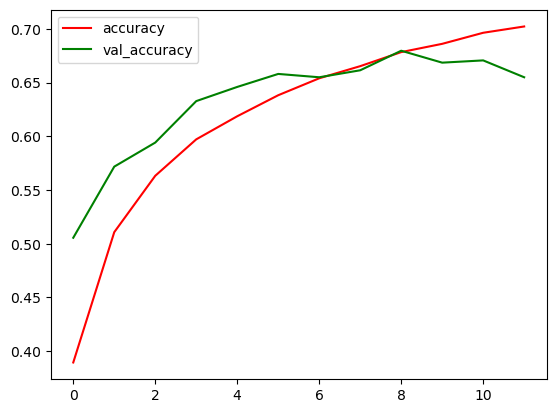

In [27]:
# 
# Your code to plot accuracy and val_accuracy vs the epochs
#

plt.figure(figsize=(10,10))
losses[['accuracy','val_accuracy']].plot(color=["red","green"])

<Axes: >

<Figure size 1000x1000 with 0 Axes>

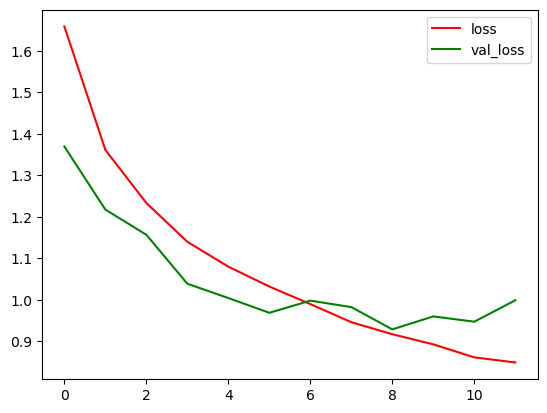

In [29]:
# 
# Your code to plot loss and val_loss vs the epochs
#

plt.figure(figsize=(10,10))
losses[['loss','val_loss']].plot(color=["red","green"])

### You could print the metrics name that model have used.

### Following code shows how to do this.

In [30]:
model.metrics_names

['loss', 'accuracy']

### Following code shows how to evaluate your model.

In [31]:
model.evaluate(x_test,y_cat_test,verbose=0)

[0.9987505078315735, 0.6549999713897705]

### Make a prediction on test data set.   

In [32]:
predictions_prob = model.predict(x_test)
predictions = predictions_prob.argmax(axis = -1)

313/313 [==============================] - 1s 3ms/step


### We could get the full classification report. 

In [33]:
# Your code to import classification_report library from sklearn.metrics
from sklearn.metrics import classification_report

In [34]:
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.65      0.76      0.70      1000\n           1       0.71      0.88      0.79      1000\n           2       0.63      0.44      0.51      1000\n           3       0.45      0.43      0.44      1000\n           4       0.57      0.70      0.63      1000\n           5       0.79      0.31      0.44      1000\n           6       0.59      0.85      0.70      1000\n           7       0.78      0.67      0.72      1000\n           8       0.75      0.74      0.75      1000\n           9       0.74      0.78      0.76      1000\n\n    accuracy                           0.66     10000\n   macro avg       0.67      0.66      0.64     10000\nweighted avg       0.67      0.66      0.64     10000\n'

### We could also get and plot confusion matrix. 

https://github.com/matplotlib/matplotlib/issues/14751

In [35]:
# Your code to import confusion_matrix library from sklearn.metrics
from sklearn.metrics import confusion_matrix

In [36]:
confusion_matrix(y_test,predictions)

array([[756,  48,  34,   8,  15,   1,  23,  11,  71,  33],
       [ 21, 876,   2,   2,   2,   1,  17,   0,  14,  65],
       [ 93,  14, 436,  75, 158,  27, 132,  22,  25,  18],
       [ 33,  29,  56, 435, 108,  31, 175,  44,  49,  40],
       [ 39,   9,  41,  34, 696,   4, 106,  48,  16,   7],
       [ 22,  19,  66, 294,  95, 307,  83,  57,  33,  24],
       [  9,  18,  19,  51,  30,   0, 846,   4,   8,  15],
       [ 38,  13,  31,  50, 101,  16,  32, 674,  11,  34],
       [113,  75,   7,   8,   7,   0,   6,   2, 745,  37],
       [ 34, 126,   5,   9,   7,   0,  13,   2,  25, 779]], dtype=int64)

<Axes: >

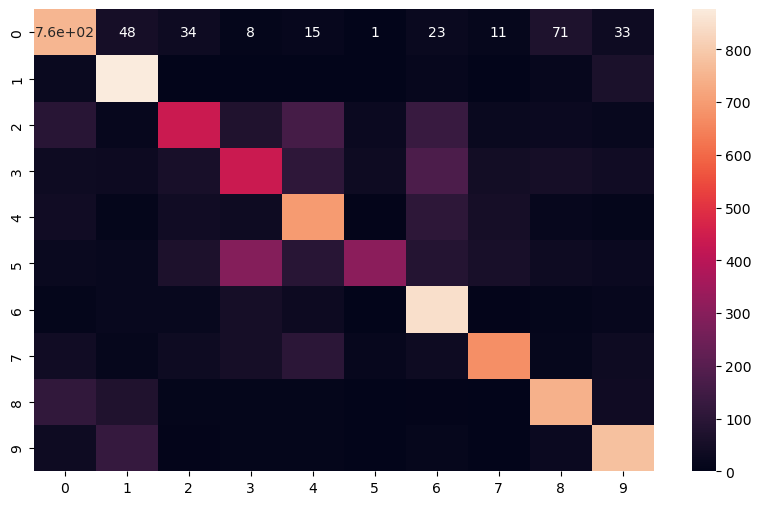

In [37]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)


# Following code makes a prediction on specific image.

In [38]:
my_image = x_test[16]

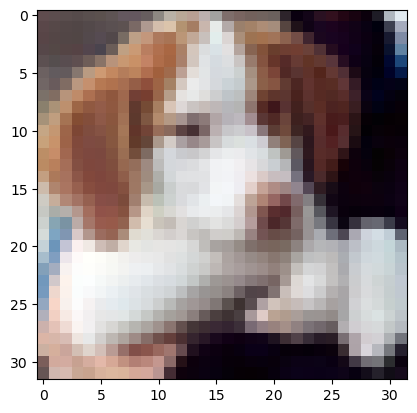

In [39]:
plt.imshow(my_image)

In [40]:
# SHAPE --> (num_images,width,height,color_channels)

model.predict(my_image.reshape(1,32,32,3))

1/1 [==============================] - 0s 26ms/step


array([[0.00165316, 0.02278668, 0.04618332, 0.58313054, 0.00137382,
        0.25014618, 0.0648276 , 0.01201793, 0.01164662, 0.00623415]],
      dtype=float32)

In [41]:
# Find the highest probability value in the vector above. 
# What output value does it point to?

np.max(model.predict(my_image.reshape(1,32,32,3)))

1/1 [==============================] - 0s 25ms/step


0.58313054

In [42]:
# Check your result to run the code:

np.argmax(model.predict(my_image.reshape(1,32,32,3)), axis = -1)

1/1 [==============================] - 0s 27ms/step


array([3], dtype=int64)

### Let's use a trained neural network
You can run the following code many times

Note the recognition probabilities for each image

1/1 [==============================] - 0s 17ms/step


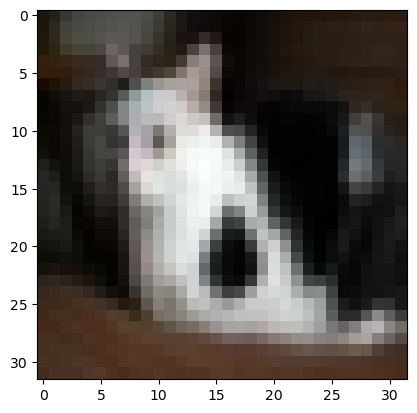

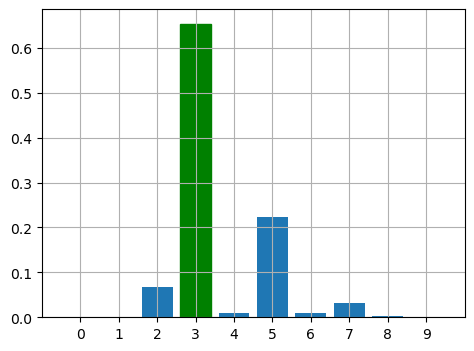

The predicted answer: cat 
 Correct answer: cat
['aircraft', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [43]:
from tensorflow.keras.preprocessing.image import array_to_img
import random

# Class names in the CIFAR-10 dataset
classes=['aircraft', 'car', 'bird', 'cat', 'deer',
'dog', 'frog', 'horse', 'ship', 'truck']

# we take a random element 'random.randint()' from the test sample
# and observe: the neural network will guess or not
index = random.randint(0, x_test.shape[0])
plt.imshow(array_to_img(x_test[index]))

# test image conversion
x = x_test[index]
x = np.expand_dims(x, axis=0)

# start recognition
prediction = model.predict(x)
sample = x

# converting the result from one hot encoding format
ans = np.argmax(prediction)

fig = plt.figure(figsize=(12,4))

ax = fig.add_subplot(1, 2, 2)
bar_list = ax.bar(np.arange(10), prediction[0], align='center')
bar_list[ans].set_color('g')
ax.set_xticks(np.arange(10))
ax.set_xlim([-1, 10])
ax.grid('on')

plt.show()

print('The predicted answer: {}'.format((classes[ans])), "\n",
     'Correct answer: {}'.format(classes[y_test[index][0]]) )

print(classes)


# You can run this cell many times, and each time you will get a new picture,which
# this neural network will recognise with the probability indicated on the graph.

## Task 2:

Evaluate your model for different optimisers available in the Keras. 

https://keras.io/api/optimizers/

- Store the optimisers in an array.
- Use for loop to fit, compile, and  test your model.
- Plot the accuracy vs optimiser


In [44]:
# Create a list containing the names of optimisers (Don't use 'AdamW' and 'Adafactor')
# Create an empty list to store scores

# For every optimiser
   # compile your model
   # fit your model, use epochs=3 for each optimiser (otherwise the training will take a long time)
   # using model.evaluate() find score and append the score in a list

# Plot score vs optimiser 

# Lab logbook requirement: 
# Please ensure to document in your laboratory logbook a graphical representation depicting the train loss and validation loss trends. 
# Based on this analysis, determine the optimal number of epochs for training your model. 